In [9]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import numpy as np
from main import SumoDQNAgent
from DQNAgent import DqnAgent
from ddpgAgent import DDPGAgent

def plot_traffic_metrics(
    fileName,
    x, time_labels,
    no_control_flow, egreedy_flow, dqn_flow, ddpg_flow,
    no_control_speed, egreedy_speed, dqn_speed, ddpg_speed,
    no_control_density, egreedy_density, dqn_density, ddpg_density,
    no_control_tt, egreedy_tt, dqn_tt, ddpg_tt
):
    # Create a figure with 2x2 subplots
    fig, axs = plt.subplots(2, 2, figsize=(14, 5))
    # Define tick positions for the x-axis
    ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

    # 1) Plot traffic flow
    axs[0, 0].plot(x, no_control_flow, label="Fixed", color="blue")  # Fixed traffic control
    axs[0, 0].plot(x, egreedy_flow, label="e-greedy", color="orange")  # e-greedy policy
    axs[0, 0].plot(x, dqn_flow, label="DQN", color="green")  # Deep Q-Network
    axs[0, 0].plot(x, ddpg_flow, label="DDPG", color="red")  # Deep Deterministic Policy Gradient
    axs[0, 0].set_title("Traffic Flow")
    axs[0, 0].set_xlabel("Time")
    axs[0, 0].set_ylabel("Flow (veh/h)")  # Traffic flow in vehicles per hour
    axs[0, 0].set_xticks(ticks)
    axs[0, 0].set_xticklabels(time_labels, rotation=45)  # Rotate time labels for readability
    axs[0, 0].grid(True)  # Add gridlines

    # 2) Plot average speed
    axs[0, 1].plot(x, [speed * 3.6 for speed in no_control_speed], label="Fixed", color="blue")  # Convert m/s to km/h
    axs[0, 1].plot(x, [speed * 3.6 for speed in egreedy_speed], label="e-greedy", color="orange")
    axs[0, 1].plot(x, [speed * 3.6 for speed in dqn_speed], label="DQN", color="green")
    axs[0, 1].plot(x, [speed * 3.6 for speed in ddpg_speed], label="DDPG", color="red")
    axs[0, 1].set_title("Average Speed")
    axs[0, 1].set_xlabel("Time")
    axs[0, 1].set_ylabel("Speed (km/h)")  # Speed in kilometers per hour
    axs[0, 1].set_xticks(ticks)
    axs[0, 1].set_xticklabels(time_labels, rotation=45)
    axs[0, 1].grid(True)

    # 3) Plot traffic density
    axs[1, 0].plot(x, no_control_density, label="Fixed", color="blue")  # Fixed traffic control
    axs[1, 0].plot(x, egreedy_density, label="e-greedy", color="orange")
    axs[1, 0].plot(x, dqn_density, label="DQN", color="green")
    axs[1, 0].plot(x, ddpg_density, label="DDPG", color="red")
    axs[1, 0].set_title("Density")
    axs[1, 0].set_xlabel("Time")
    axs[1, 0].set_ylabel("Density (veh/km/lane)")  # Density in vehicles per kilometer per lane
    axs[1, 0].set_xticks(ticks)
    axs[1, 0].set_xticklabels(time_labels, rotation=45)
    axs[1, 0].grid(True)

    # 4) Plot travel time
    axs[1, 1].plot(x, no_control_tt, label="Fixed", color="blue")  # Fixed traffic control
    axs[1, 1].plot(x, egreedy_tt, label="e-greedy", color="orange")
    axs[1, 1].plot(x, dqn_tt, label="DQN", color="green")
    axs[1, 1].plot(x, ddpg_tt, label="DDPG", color="red")
    axs[1, 1].set_title("Travel Time")
    axs[1, 1].set_xlabel("Time")
    axs[1, 1].set_ylabel("Time (s)")  # Travel time in seconds
    axs[1, 1].set_xticks(ticks)
    axs[1, 1].set_xticklabels(time_labels, rotation=45)
    axs[1, 1].grid(True)

    # Collect all handles and labels from subplots for a unified legend
    handles_labels = [ax.get_legend_handles_labels() for ax in axs.ravel()]
    handles = []
    labels = []
    for h, l in handles_labels:
        handles.extend(h)
        labels.extend(l)

    # Remove duplicates using a dictionary
    unique_dict = dict(zip(labels, handles))
    unique_labels = list(unique_dict.keys())
    unique_handles = list(unique_dict.values())

    # Adjust layout for clarity and avoid overlapping
    plt.tight_layout()
    fig.subplots_adjust(top=0.85)

    # Create a shared legend for the entire figure
    fig.legend(unique_handles, unique_labels,
               loc='upper center',
               bbox_to_anchor=(0.5, 0.98),
               ncol=4)

    plt.savefig(fileName)

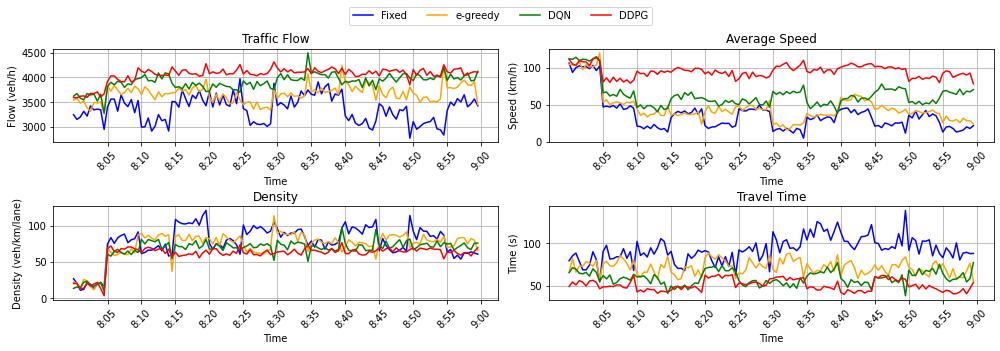

In [6]:
file_names = ["no_control.pkl", "egreedy.pkl", "dqn.pkl", "ddpg.pkl"]
data = {}
directory = "trained_models" 

# Iterate through each file in the directory
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    with open(file_path, "rb") as f:
        data[file_name] = pickle.load(f)  # Load data from the pickle file

# Define time intervals (x-axis) and corresponding labels
x = np.arange(120)  # 0..12
time_labels = [
    "8:05","8:10","8:15","8:20","8:25",
    "8:30","8:35","8:40","8:45","8:50","8:55","9:00"
]

# Call the plot function with loaded data
plot_traffic_metrics(
    "traffic_metrics.png",  # Output file name for the plot
    x, time_labels,  # Time intervals and labels
    data["no_control.pkl"]["flow"], data["egreedy.pkl"]["flow"], data["dqn.pkl"]["flow"], data["ddpg.pkl"]["flow"],
    data["no_control.pkl"]["speed"], data["egreedy.pkl"]["speed"], data["dqn.pkl"]["speed"], data["ddpg.pkl"]["speed"],
    data["no_control.pkl"]["density"], data["egreedy.pkl"]["density"], data["dqn.pkl"]["density"], data["ddpg.pkl"]["density"],
    data["no_control.pkl"]["tt"], data["egreedy.pkl"]["tt"], data["dqn.pkl"]["tt"], data["ddpg.pkl"]["tt"]
)

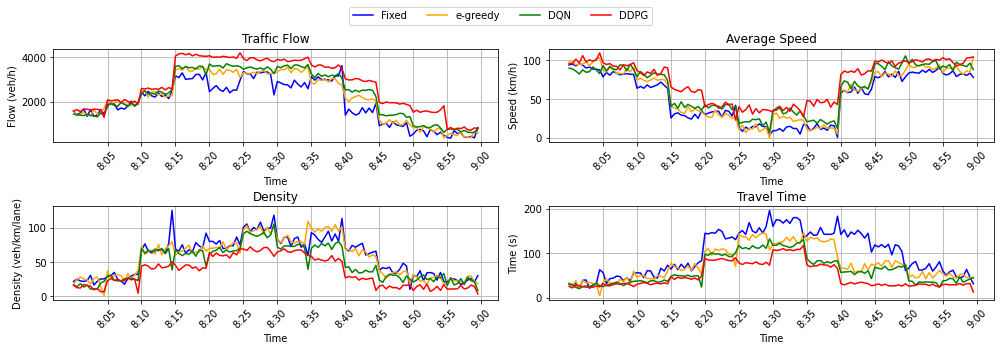

In [7]:
file_names = ["no_control_peak.pkl", "egreedy_peak.pkl", "dqn_peak.pkl", "ddpg_peak.pkl"]
data = {}
directory = "trained_models" 

# Iterate through each file in the directory
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    with open(file_path, "rb") as f:
        data[file_name] = pickle.load(f)  # Load data from the pickle file

# Define time intervals (x-axis) and corresponding labels
x = np.arange(120)  # 0..12
time_labels = [
    "8:05","8:10","8:15","8:20","8:25",
    "8:30","8:35","8:40","8:45","8:50","8:55","9:00"
]

# Call the plot function with loaded data
plot_traffic_metrics(
    "traffic_metrics_peak.png",  # Output file name for the plot
    x, time_labels,  # Time intervals and labels
    data["no_control_peak.pkl"]["flow"], data["egreedy_peak.pkl"]["flow"], data["dqn_peak.pkl"]["flow"], data["ddpg_peak.pkl"]["flow"],
    data["no_control_peak.pkl"]["speed"], data["egreedy_peak.pkl"]["speed"], data["dqn_peak.pkl"]["speed"], data["ddpg_peak.pkl"]["speed"],
    data["no_control_peak.pkl"]["density"], data["egreedy_peak.pkl"]["density"], data["dqn_peak.pkl"]["density"], data["ddpg_peak.pkl"]["density"],
    data["no_control_peak.pkl"]["tt"], data["egreedy_peak.pkl"]["tt"], data["dqn_peak.pkl"]["tt"], data["ddpg_peak.pkl"]["tt"]
)

In [8]:
file_names = ["128_64_32_C_128_64.pkl", "128_64_32_C_128_128_32.pkl", "64_32_C_32_32.pkl"]
data = {}
directory = "trained_models" 

# Iterate through each file in the directory
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    with open(file_path, "rb") as f:
        data[file_name] = pickle.load(f)  # Load data from the pickle file

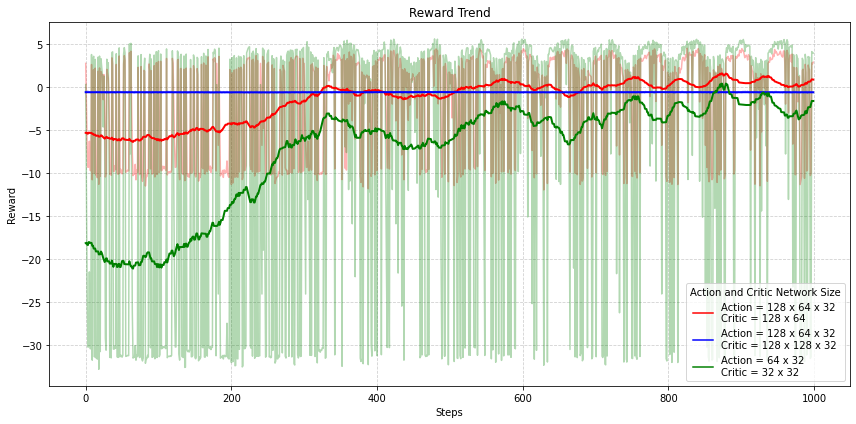

In [10]:
# Define a function for calculating the moving average of data
def moving_average(data, window_size):
    """
    Smooths the data using a moving average.
    If the data length is shorter than the window size, returns the data as is.
    """
    if len(data) < window_size:
        return data  # Prevent oversmoothing for small datasets
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Adjust the window size for the moving average
window_size = 100  
reward1 = data['128_64_32_C_128_64.pkl']
reward2 = data['128_64_32_C_128_128_32.pkl']
reward3 = data['64_32_C_32_32.pkl']

# Smooth the rewards using the moving average function
smoothed_reward1 = moving_average(data['128_64_32_C_128_64.pkl'], window_size)
smoothed_reward2 = moving_average(reward2, window_size)
smoothed_reward3 = moving_average(reward3, window_size)

# Define colors for plotting (customizable)
colors = ['red', 'blue', 'green']

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot raw rewards with lighter colors for transparency
plt.plot(reward1[0:1000], label="Raw Rewards 1", alpha=0.3, color=colors[0])
plt.plot(reward2[0:1000], label="Raw Rewards 2", alpha=0.3, color=colors[1])
plt.plot(reward3[0:1000], label="Raw Rewards 3", alpha=0.3, color=colors[2])

# Plot smoothed rewards with solid lines and thicker widths
plt.plot(range(len(smoothed_reward1[0:1000])), smoothed_reward1[0:1000], 
         label="Smoothed Rewards 1", color=colors[0], linewidth=2)
plt.plot(range(len(smoothed_reward2[0:1000])), smoothed_reward2[0:1000], 
         label="Smoothed Rewards 2", color=colors[1], linewidth=2)
plt.plot(range(len(smoothed_reward3[0:1000])), smoothed_reward3[0:1000], 
         label="Smoothed Rewards 3", color=colors[2], linewidth=2)

# Add title and axis labels
plt.title("Reward Trend")
plt.xlabel("Steps")
plt.ylabel("Reward")

# Create custom legends for the different network configurations
delay_lines = [
    mlines.Line2D([], [], color='red', linestyle='-', label='Action = 128 x 64 x 32\nCritic = 128 x 64'),
    mlines.Line2D([], [], color='blue', linestyle='-', label='Action = 128 x 64 x 32\nCritic = 128 x 128 x 32'),
    mlines.Line2D([], [], color='green', linestyle='-', label='Action = 64 x 32\nCritic = 32 x 32')
]

# Display the legend in the lower right corner
plt.legend(handles=delay_lines, loc="lower right", title="Action and Critic Network Size")

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Automatically adjust layout to prevent clipping
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('Reward.pdf')

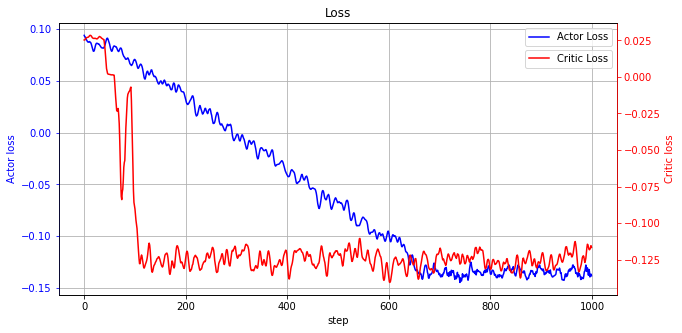

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the input CSV file
file_path = 'loss_log1.csv'

# Load data from CSV file
data_df = pd.read_csv(file_path, delimiter=',')

# Plot the interpolated losses
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot Actor Loss
ax1.plot(data_df["Step"], data_df['Actor Loss'], 'b-', label='Actor Loss')

# Plot Critic Loss
ax2.plot(data_df["Step"], data_df['Critic Loss'], 'r-', label='Critic Loss')

# Set axis labels and title
ax1.set_xlabel('step')
ax1.set_ylabel('Actor loss', color='blue')
ax2.set_ylabel('Critic loss', color='red')
ax1.set_title('Loss')

# Thay đổi màu mũi tên của trục
ax1.spines['left'].set_color('blue')  # Trục y1 màu xanh
ax2.spines['right'].set_color('red')  # Trục y2 màu đỏ

ax1.tick_params(axis='y', colors='blue')  # Màu cho nhãn trục y1
ax2.tick_params(axis='y', colors='red')  # Màu cho nhãn trục y2

# Thêm chú thích
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.92))

# Định dạng trục và hiển thị
ax1.grid(True)
plt.savefig('Loss.pdf')